# Dask Cluster Creation

Dask-CHTC's primary job is to provide `CHTCCluster`,
an object that manages a pool of Dask workers on the CHTC pool on your behalf.
To start computing with Dask itself,
all we need to do is connect our `CHTCCluster` to a standard `dask.distributed` `Client`.
This notebook shows you how to do that.

If you are reading the notebook in the documentation,
you can download a copy of this notebook to run on the CHTC pool yourself
by clicking on "View page source" link in the top right, then saving
the raw notebook as `example.ipynb` and uploading it via the Jupyter interface.

If you are running this notebook live using JupyterLab,
we recommend installing the
[Dask JupyterLab Extension](https://github.com/dask/dask-labextension).
We'll point out what dashboard address to point it to later in the notebook.

## Create Cluster and Client

In [1]:
from dask_chtc import CHTCCluster
from dask.distributed import Client

In [2]:
cluster = CHTCCluster()
cluster

CHTCCluster('tcp://128.104.100.44:3388', workers=0, threads=0, memory=0 B)

In [3]:
client = Client(cluster)
client

Client Scheduler: tcp://128.104.100.44:3388 Dashboard: http://128.104.100.44:3687/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


(If you are running this notebook live, you now have enough information to hook up the Dask JupyterLab extension -- make sure you forward the dashboard port over SSH, then point the extension at `locahost:<local port>`.)

## Scale the Cluster

There are two ways to ask the cluster to get workers: ``Cluster.scale`` and ``Cluster.adapt``.
``Cluster.scale`` submits requests for a certain number of workers exactly one time.
This is not sufficiently flexible for use in the CHTC pool, where your workers may come-and-go unexpectedly, for reasons outside of your control.
**We recommend always using** ``Cluster.adapt``, which lets you set a minimum and maximum number of workers (or amount of cores/memory/etc.) to keep in your Dask worker pool.
It will dynamically submit extra worker requests as necessary to meet the minimum, or to meet increased demand by your workflow.

Let's ask for at least 10, and up to 20 workers:

In [4]:
cluster.adapt(minimum=10, maximum=20);

It will likely take a few minutes for the workers to show up in your pool.
They must first find some available resource, then download the Docker image they will run inside.

## Do Some Calculations

Let's flex our cluster by doing a small calculation: we'll create a Dask array of `1`s and add it to its own transpose.

In [5]:
import dask.array as da

In [6]:
x = da.ones((15, 15), chunks = 5)
x

dask.array<ones, shape=(15, 15), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

Now we'll add `x` to its own transpose. Note that Dask doesn't actually do anything yet; it is just building up a task graph representing the computation.

In [7]:
y = x + x.T
y

dask.array<add, shape=(15, 15), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

We can visualize the task graph that Dask will execute to compute `y` by calling the `visualize` method. If this doesn't work for you, you may need to install Graphviz and the Python wrapper for it: `conda install python-graphviz`.

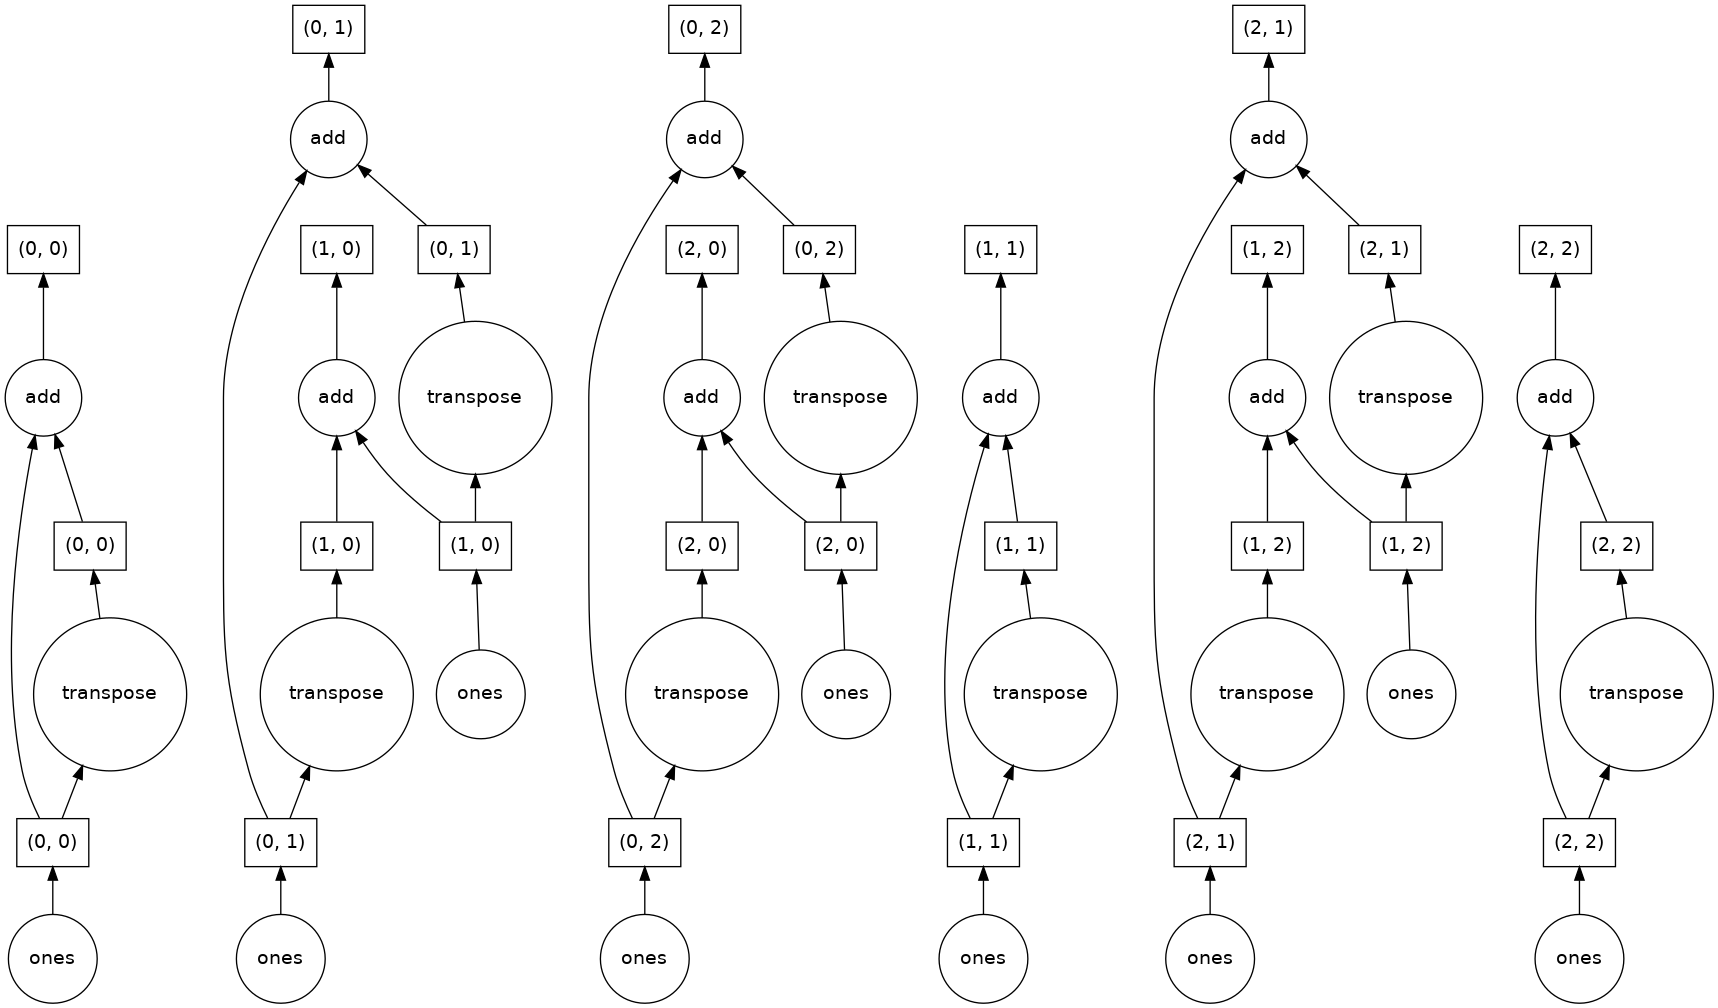

In [8]:
y.visualize()

We can execute the computation by calling the `compute` method on `y`:

In [9]:
z = y.compute()
z

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2.

## What's Next?

1. Learn more about how to use Dask for parallel computing. For example, you could go through the [Dask tutorial](https://github.com/dask/dask-tutorial), or read about [how to use Dask-ML for hyperparameter search](https://ml.dask.org/hyper-parameter-search.html).
1. Check out the various [configuration options](api.rst#dask_chtc.CHTCCluster) available to you on the `CHTCCluster`.
   You can pass arguments to it to define what kind of workers to request.
   For example, you can set how much memory they should have, which Docker image they should run in, or set them to request GPUs.
1. If you have extra requirements beyond what is in the
   [default Docker image](https://hub.docker.com/r/daskdev/dask/dockerfile),
   consider [building your own Docker image](docker.rst).